In [ ]:
# 마이크에 입력받아 wave를 생성
# 윈도우 마이크 앱을 반드시 허용할 것

<div>
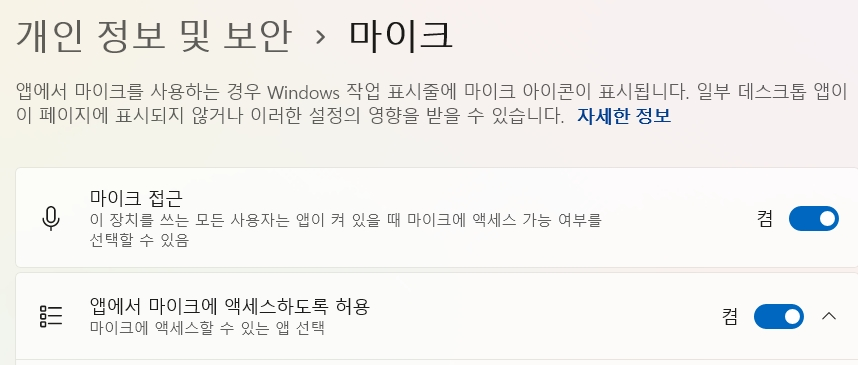
</div>

In [20]:
import soundfile as sf
import sounddevice as sd
import numpy as np
import sys
from queue import Queue

In [21]:
sd.default.device

[1, 4]

In [22]:
sd.query_devices()

   0 Microsoft 사운드 매퍼 - Input, MME (2 in, 0 out)
>  1 External Mic(Realtek(R) Audio), MME (2 in, 0 out)
   2 Microphone Array(Realtek(R) Aud, MME (2 in, 0 out)
   3 Microsoft 사운드 매퍼 - Output, MME (0 in, 2 out)
<  4 Headphones(Realtek(R) Audio), MME (0 in, 2 out)
   5 Speakers(Realtek(R) Audio), MME (0 in, 2 out)
   6 주 사운드 캡처 드라이버, Windows DirectSound (2 in, 0 out)
   7 External Mic(Realtek(R) Audio), Windows DirectSound (2 in, 0 out)
   8 Microphone Array(Realtek(R) Audio), Windows DirectSound (2 in, 0 out)
   9 주 사운드 드라이버, Windows DirectSound (0 in, 2 out)
  10 Headphones(Realtek(R) Audio), Windows DirectSound (0 in, 2 out)
  11 Speakers(Realtek(R) Audio), Windows DirectSound (0 in, 2 out)
  12 Speakers(Realtek(R) Audio), Windows WASAPI (0 in, 2 out)
  13 Headphones(Realtek(R) Audio), Windows WASAPI (0 in, 2 out)
  14 External Mic(Realtek(R) Audio), Windows WASAPI (2 in, 0 out)
  15 Microphone Array(Realtek(R) Audio), Windows WASAPI (2 in, 0 out)
  16 Headphones 1 (Realtek HD Audio 2

In [23]:
sd.query_devices(1,'input')

{'name': 'External Mic(Realtek(R) Audio)',
 'hostapi': 0,
 'max_input_channels': 2,
 'max_output_channels': 0,
 'default_low_input_latency': 0.09,
 'default_low_output_latency': 0.09,
 'default_high_input_latency': 0.18,
 'default_high_output_latency': 0.18,
 'default_samplerate': 44100.0}

In [24]:
sd.default.channels

[None, None]

In [25]:
sr = 44100
ch = 2
subtype = 'PCM_32' # sample_width 4byte(32bit)

In [26]:
q = Queue()
def callback(indata, frames, time, status):
    if status:
        print(status, file=sys.stderr)
    # 소리 낼 때만 녹음
    if np.max(indata ) > 5e-5:
        q.put(indata.copy())
    
try:
    file = sf.SoundFile('sd_microphone_test.wav','w',sr,ch,subtype)
    with file:
        with sd.InputStream(samplerate=sr, channels=ch, callback=callback):
            while True:
                file.write(q.get())
                # sig = q.get()
                # print(np.max(sig))
except KeyboardInterrupt as ke:
    print("Recording finished")
except Exception as e:
    print(e)
    

Recording finished


In [28]:
sig, sr = sf.read('sd_microphone_test.wav')
sd.play(sig,sr)
# sd.wait()